# 4 (and a half) quick and easy ways to visualise missing data in Python

Code for the following Medium article: [link](https://levelup.gitconnected.com/4-and-a-half-quick-and-easy-ways-to-visualise-missing-data-in-python-1e648ea82f38)

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Settings

In [2]:
# Udate default figsize ratio
plt.rcParams['figure.figsize'] = [16, 9]

## Mock data

In [3]:
n = float("nan")

df = pd.DataFrame(
    {
        "col 1": [4, n, 4, 6, 9, 4, 7, 6, 4, 7, 2, 7, 2, 6, 9],
        "col 2": [8, 7, 3, n, 1, n, 9, 3, 6, 2, 5, 7, n, 9, 4],
        "col 3": [3, 1, 9, 2, 2, 5, 2, 8, 9, 1, 4, 5, 5, 8, 9],
        "col 4": [n, 3, 9, 5, 2, 4, 2, 9, n, n, 3, n, n, 4, n]
    }
)

df

,col 1,col 2,col 3,col 4
0,4.0,8.0,3,NaN
1,NaN,7.0,1,3.0
2,4.0,3.0,9,9.0
3,6.0,NaN,2,5.0
4,9.0,1.0,2,2.0
5,4.0,NaN,5,4.0
6,7.0,9.0,2,2.0
7,6.0,3.0,8,9.0
8,4.0,6.0,9,NaN
9,7.0,2.0,1,NaN


### Prepare `df` for plotting

Using `df.isna()` produces a DataFrame of `True/False` values and this allows to visualize missing values easily.

In [4]:
df.isna()

,col 1,col 2,col 3,col 4
0,False,False,False,True
1,True,False,False,False
2,False,False,False,False
3,False,True,False,False
4,False,False,False,False
5,False,True,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,True
9,False,False,False,True


## Create matrix

`cmap` options to select from:
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [5]:
# list all available cmaps
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

### Way 1 - `.pcolormesh()`

**Basic plot**

If you see two colours - you've got some missing data.

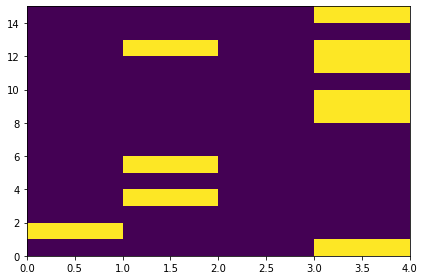

In [6]:
# one liner
plt.pcolormesh(df.isna())

plt.tight_layout()

plt.savefig(
    fname="plot1.png",
    facecolor="white",
    format="png",
    dpi=125
)

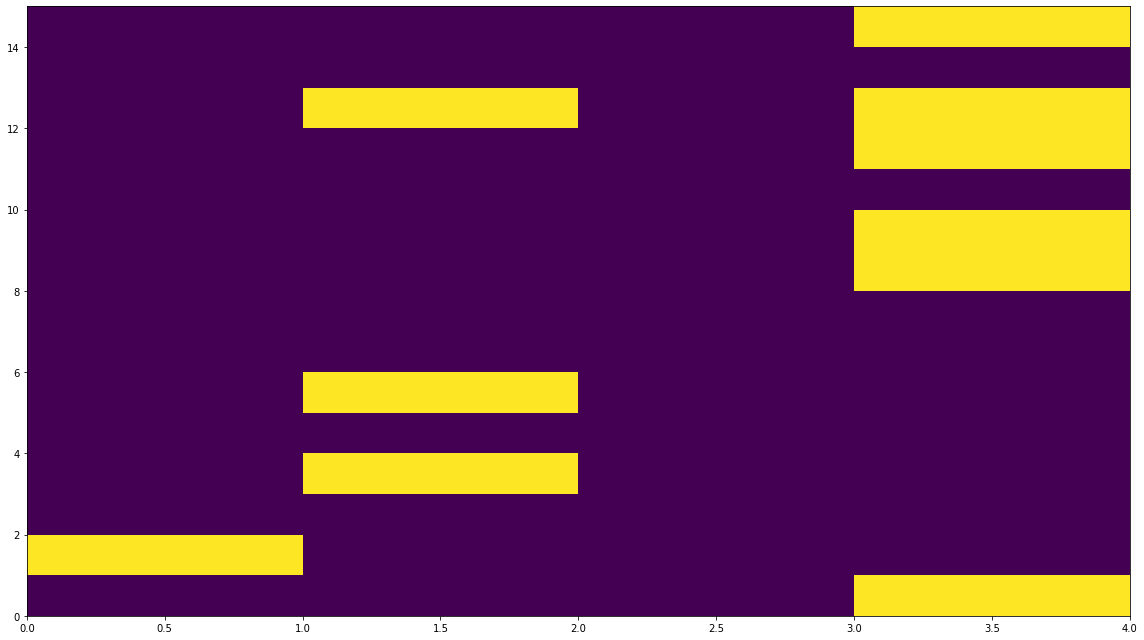

In [7]:
# explicit approach
fig, ax = plt.subplots(
    figsize=(16, 9)
)
ax.pcolormesh(
    df.isna()
)

plt.tight_layout()

plt.savefig(
    fname="plot2.png",
    facecolor="white",
    format="png",
    dpi=125
)

**Plot with tweaks**

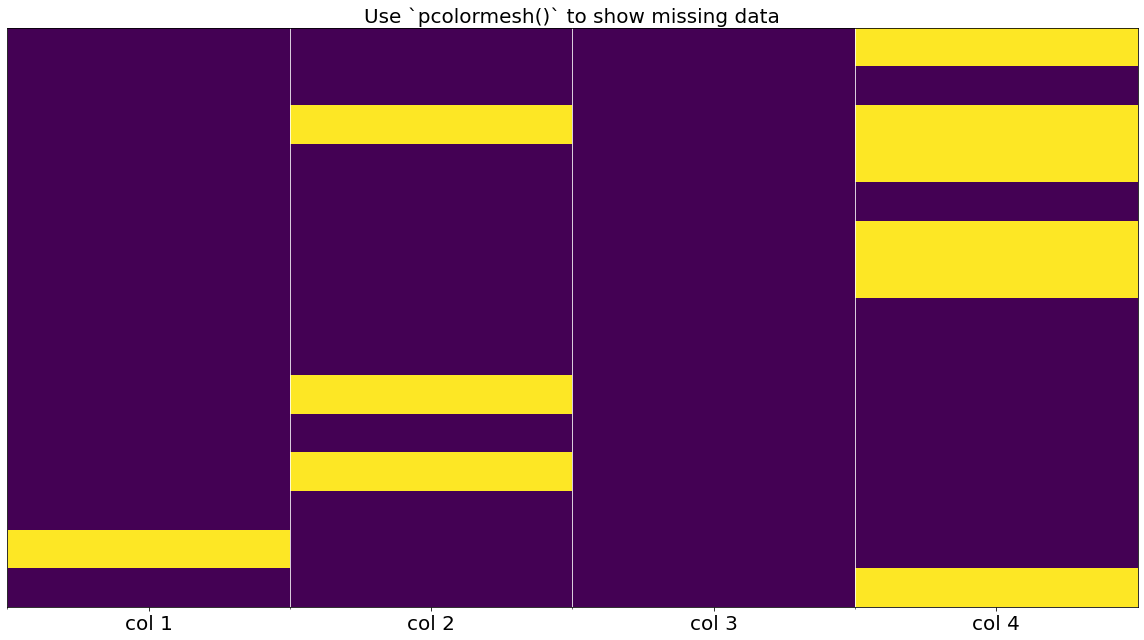

In [8]:
# explicit approach
fig, ax = plt.subplots(
    figsize=(16, 9)
)
ax.pcolormesh(
    df.isna()
)

# ---- Tweaks -----
# set title
ax.set_title(
    "Use `pcolormesh()` to show missing data",
    fontsize=20
)

# x-axis tick labels
ax.set_xticks(np.arange(0.5, df.shape[1]))
ax.set_xticklabels(
    df.columns,
    fontsize=20
)

# set minor ticks for the grid lines
ax.set_xticks(
    np.arange(0, df.shape[1]),
    minor=True
)
ax.grid(
    axis="x",
    which="minor",
    color="white"
)

# remove ticks on y-axis
ax.tick_params(
    left=False,
    labelleft=False
)

plt.tight_layout()

plt.savefig(
    fname="plot3.png",
    facecolor="white",
    format="png",
    dpi=125
)

### Way 2 - `.pcolor()`

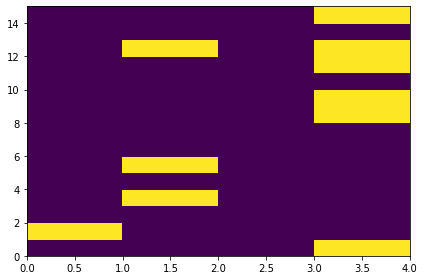

In [9]:
# one liner
plt.pcolor(df.isna());


plt.tight_layout()

plt.savefig(
    fname="plot4.png",
    facecolor="white",
    format="png",
    dpi=125
)

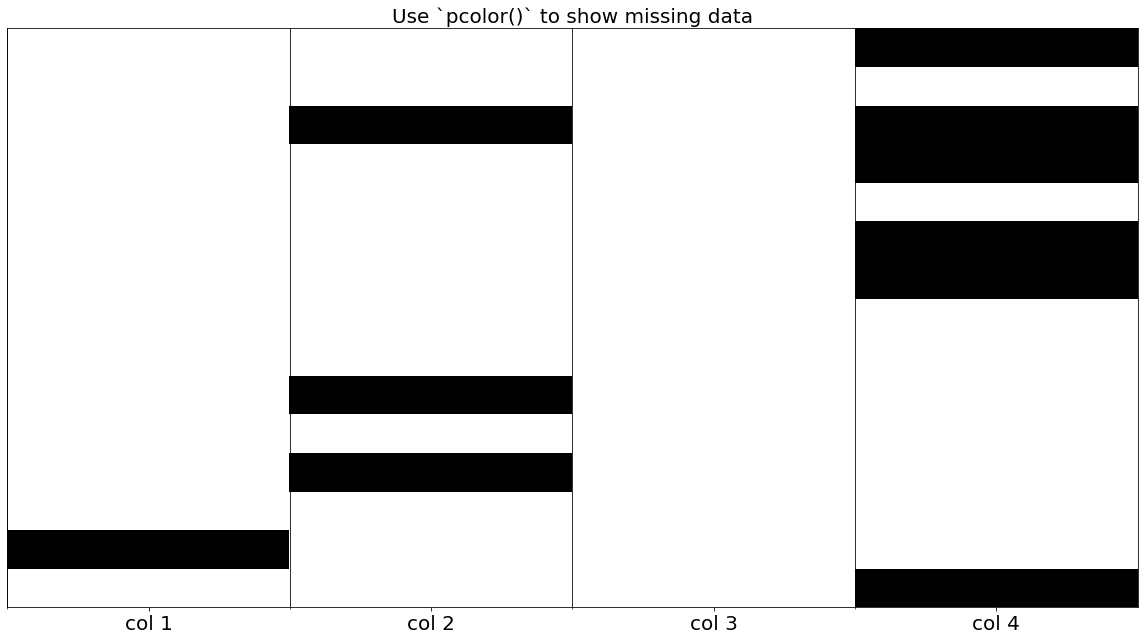

In [10]:
# explicit approach
fig, ax = plt.subplots(
    figsize=(16 ,9)
)
ax.pcolor(
    df.isna(),
    cmap="Greys"
)

# ---- Tweaks -----
# set title
ax.set_title(
    "Use `pcolor()` to show missing data",
    fontsize=20
)

# x-axis tick labels
ax.set_xticks(np.arange(0.5, df.shape[1]))
ax.set_xticklabels(
    df.columns,
    fontsize=20
)

# set minor ticks for the grid lines
ax.set_xticks(
    np.arange(0, df.shape[1]),
    minor=True
)
ax.grid(
    axis="x",
    which="minor",
    color="black"
)

# remove ticks on y-axis
ax.tick_params(
    left=False,
    labelleft=False
)

plt.tight_layout()

plt.savefig(
    fname="plot5.png",
    facecolor="white",
    format="png",
    dpi=125
)

### Way 3 - `.imshow()`

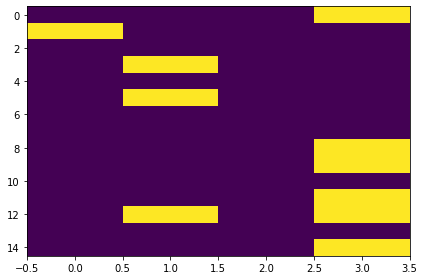

In [11]:
# one liner
plt.imshow(df.isna(), aspect="auto");

plt.tight_layout()

plt.savefig(
    fname="plot6.png",
    facecolor="white",
    format="png",
    dpi=125
)

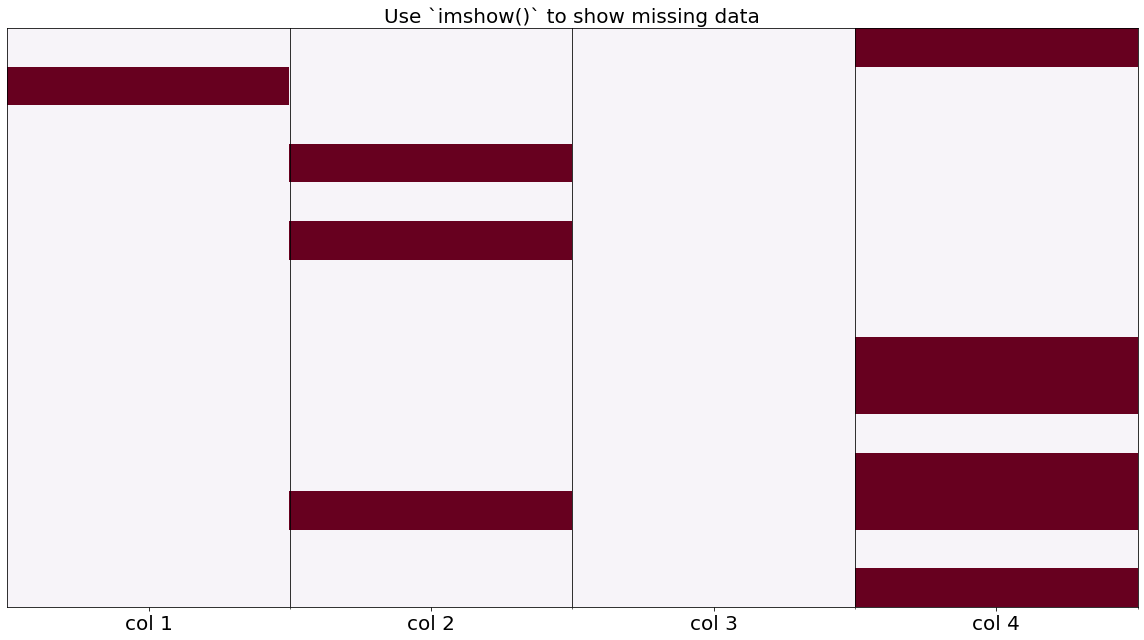

In [12]:
# explicit approach
fig, ax = plt.subplots(
    figsize=(16, 9)
)
ax.imshow(
    df.isna(),
    aspect="auto",
    cmap="PuRd"
)

# ---- Tweaks -----
# set title
ax.set_title(
    "Use `imshow()` to show missing data",
    fontsize=20
)

# x-axis tick labels
ax.set_xticks(np.arange(0, df.shape[1]))
ax.set_xticklabels(
    df.columns,
    fontsize=20
)

# set minor ticks for the grid lines
ax.set_xticks(
    np.arange(0.5, df.shape[1]),
    minor=True
)
ax.grid(
    axis="x",
    which="minor",
    color="black"
)

# remove ticks on y-axis
ax.tick_params(
    left=False,
    labelleft=False
)

plt.tight_layout()

plt.savefig(
    fname="plot7.png",
    facecolor="white",
    format="png",
    dpi=125
)

### Extra tip: transpose `DataFrame` with many columns

In case your data has many columns it might be easier to visualise tranposed data as it will better fit on the screen.

**Generate new data**

In [13]:
new_data = np.ones((30, 20))
for i in range(np.shape(new_data)[1]):
    new_data[:, i] = np.random.choice([1, np.nan], np.shape(new_data)[0])

df_big = pd.DataFrame(
    new_data,
    columns=[f"col_{x}" for x in range(20)]
)

df_big

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0
1,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
4,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN
5,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0
7,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
8,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0
9,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN


**Plot**

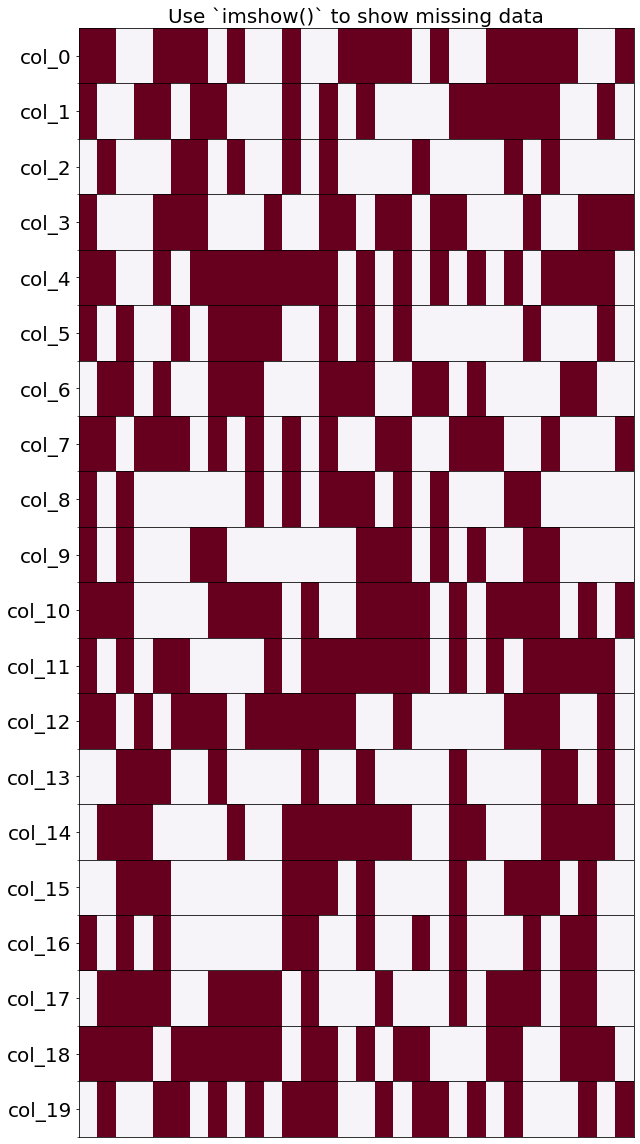

In [14]:
# explicit approach
fig, ax = plt.subplots(
    figsize=(9,16)
)
ax.imshow(
    df_big.isna().transpose(),
    aspect="auto",
    cmap="PuRd"
)

# ---- Tweaks -----
# set title
ax.set_title(
    "Use `imshow()` to show missing data",
    fontsize=20
)

# y-axis tick labels
ax.set_yticks(np.arange(0, df_big.shape[1]))
ax.set_yticklabels(
    df_big.columns,
    fontsize=20
)

# set minor ticks for the grid lines
ax.set_yticks(
    np.arange(0.5, df_big.shape[1]),
    minor=True
)
ax.grid(
    axis="y",
    which="minor",
    color="black"
)

# remove ticks on y-axis
ax.tick_params(
    bottom=False,
    labelbottom=False
)

plt.tight_layout()

plt.savefig(
    fname="plot8.png",
    facecolor="white",
    format="png",
    dpi=125
)

## Way 4 - `.bar()`

In [15]:
df

,col 1,col 2,col 3,col 4
0,4.0,8.0,3,NaN
1,NaN,7.0,1,3.0
2,4.0,3.0,9,9.0
3,6.0,NaN,2,5.0
4,9.0,1.0,2,2.0
5,4.0,NaN,5,4.0
6,7.0,9.0,2,2.0
7,6.0,3.0,8,9.0
8,4.0,6.0,9,NaN
9,7.0,2.0,1,NaN


In [16]:
# Count non empty
df.count()

col 1    14
col 2    12
col 3    15
col 4     9
dtype: int64

In [17]:
# Count empty
df.isnull().sum()

col 1    1
col 2    3
col 3    0
col 4    6
dtype: int64

### Show only non empty

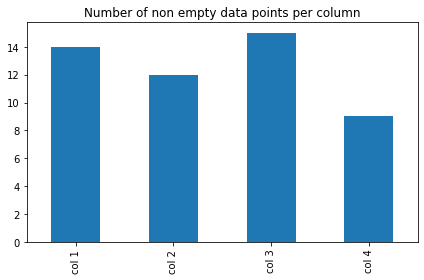

In [18]:
# one liner
df.count().plot(kind="bar", title="Number of non empty data points per column");

plt.tight_layout()

plt.savefig(
    fname="plot9.png",
    facecolor="white",
    format="png",
    dpi=125
)

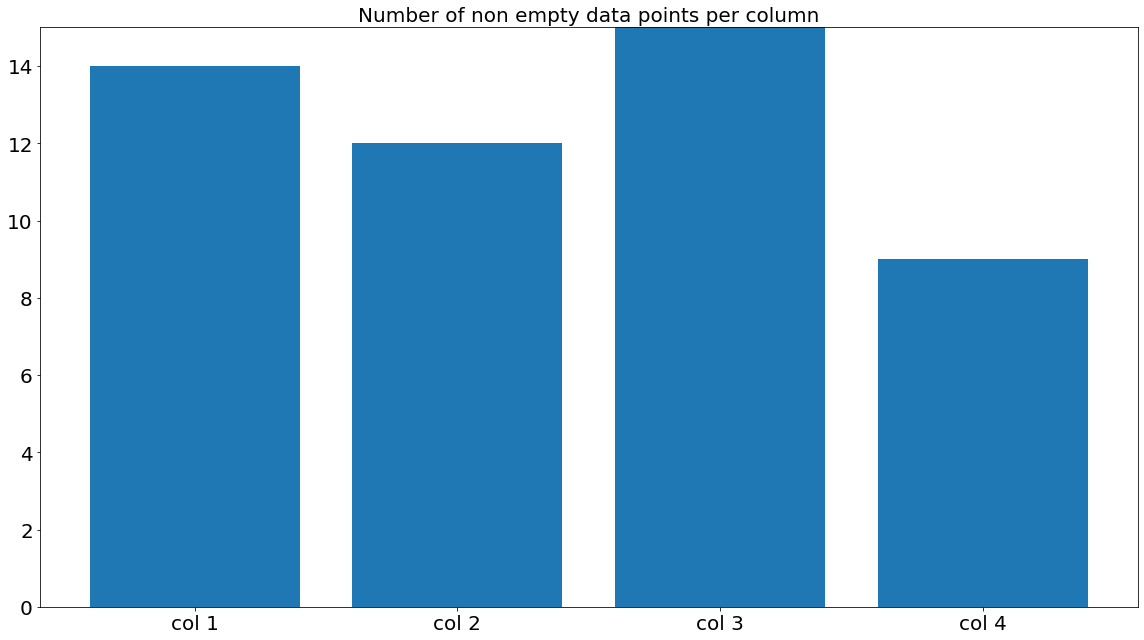

In [19]:
# explicit approach
fig, ax = plt.subplots(
    figsize=(16, 9)
)
ax.bar(
    x=df.count().index,
    height=df.count()
)

# ---- Tweaks -----
# set title
ax.set_title(
    "Number of non empty data points per column",
    fontsize=20
)

# set axis limits: TOP being the nr of rows in the `df`
ax.set_ylim(0, len(df))

ax.tick_params(
    which="both",
    labelsize=20
)

plt.tight_layout()

plt.savefig(
    fname="plot10.png",
    facecolor="white",
    format="png",
    dpi=125
)

### Show only empty

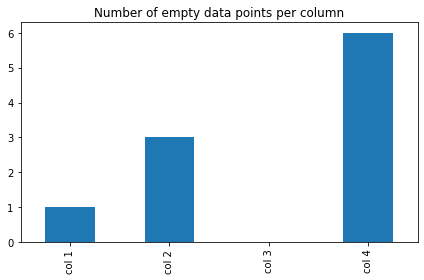

In [20]:
# one liner
df.isnull().sum().plot(kind="bar", title="Number of empty data points per column")

plt.tight_layout()

plt.savefig(
    fname="plot11.png",
    facecolor="white",
    format="png",
    dpi=125
)

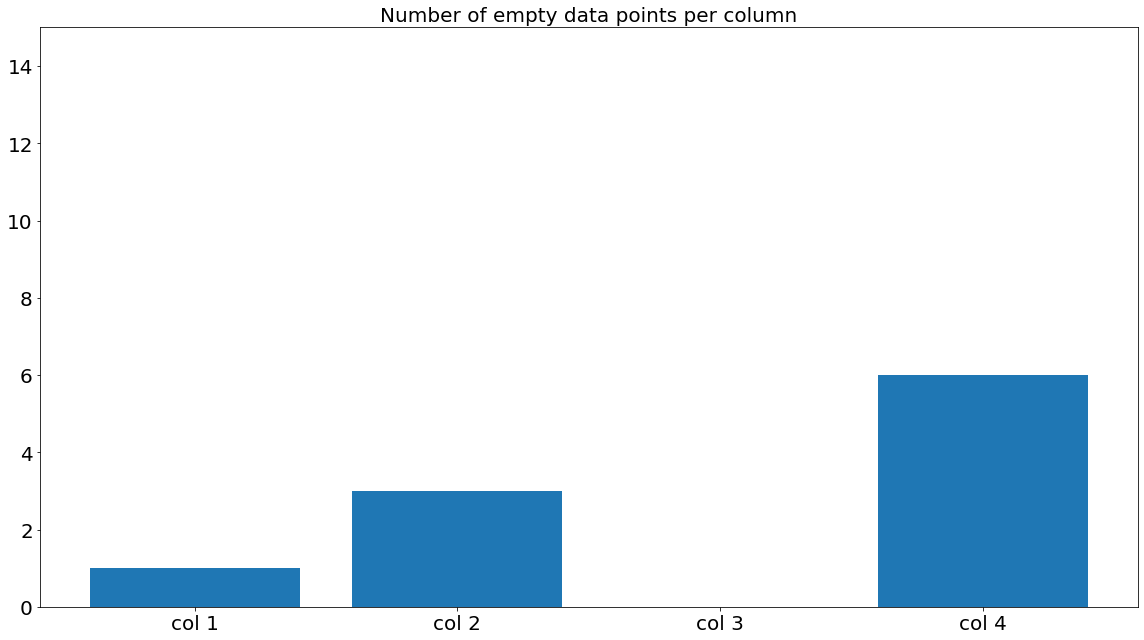

In [21]:
# explicit approach
fig, ax = plt.subplots(
    figsize=(16, 9)
)
ax.bar(
    x=df.isnull().sum().index,
    height=df.isnull().sum()
)

# ---- Tweaks -----
# set title
ax.set_title(
    "Number of empty data points per column",
    fontsize=20
)

# set axis limits: TOP being the nr of rows in the `df`
ax.set_ylim(0, len(df))

ax.tick_params(
    which="both",
    labelsize=20
)

plt.tight_layout()

plt.savefig(
    fname="plot12.png",
    facecolor="white",
    format="png",
    dpi=125
)

### Show both

In [22]:
new_df=pd.concat(
    [
        df.count().rename("non-empty"),
        df.isnull().sum().rename("empty")
    ],
    axis=1,
)

In [23]:
new_df

,non-empty,empty
col 1,14,1
col 2,12,3
col 3,15,0
col 4,9,6


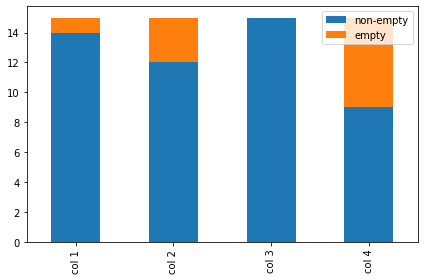

In [24]:
# one liner
new_df.plot(kind="bar", stacked=True)

plt.tight_layout()

plt.savefig(
    fname="plot13.png",
    facecolor="white",
    format="png",
    dpi=125
)

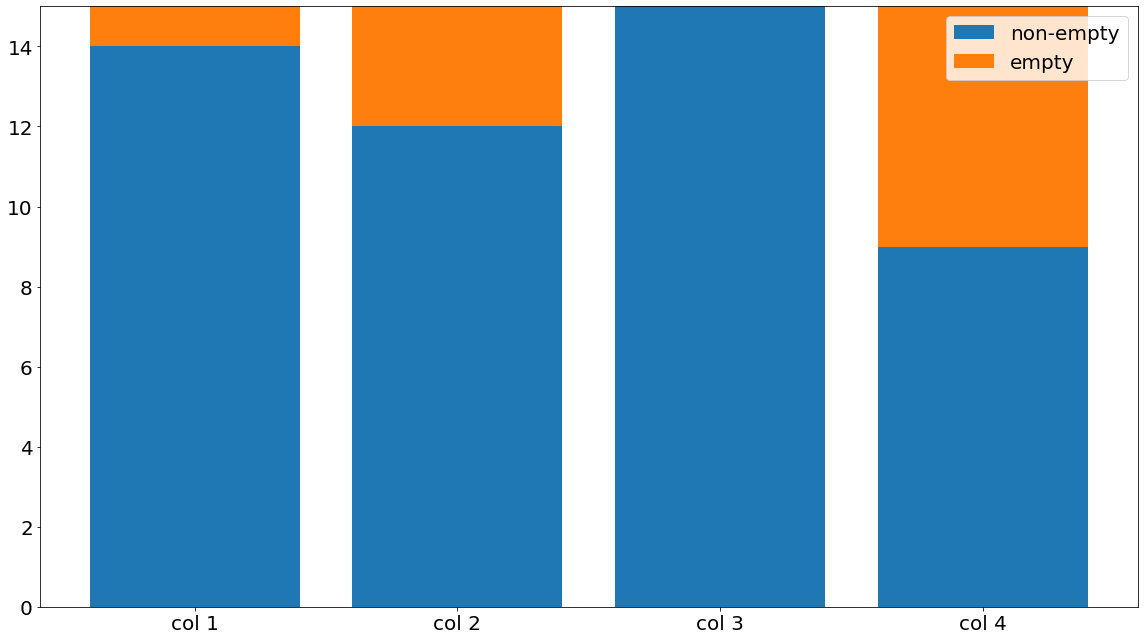

In [25]:
# explicit way
fig, ax = plt.subplots(
    figsize=(16, 9)
)
ax.bar(
    x=new_df.index,
    height=new_df.iloc[:, 0],
    bottom=0,
    label=new_df.columns[0]
)
ax.bar(
    x=new_df.index,
    height=new_df.iloc[:, 1],
    bottom=new_df.iloc[:, 0],
    label=new_df.columns[1]
)

# ---- Tweaks -----
# set axis limits: TOP being the nr of rows in the `df`
ax.set_ylim(0, len(df))

ax.tick_params(
    which="both",
    labelsize=20
)

ax.legend(
    fontsize=20
)

plt.tight_layout()

plt.savefig(
    fname="plot14.png",
    facecolor="white",
    format="png",
    dpi=125
)

## Create table

### `df.info()`

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col 1   14 non-null     float64
 1   col 2   12 non-null     float64
 2   col 3   15 non-null     int64  
 3   col 4   9 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 608.0 bytes


### summary df

In [27]:
new_df

,non-empty,empty
col 1,14,1
col 2,12,3
col 3,15,0
col 4,9,6


### markdown table

In [28]:
print(new_df.to_markdown())

|       |   non-empty |   empty |
|:------|------------:|--------:|
| col 1 |          14 |       1 |
| col 2 |          12 |       3 |
| col 3 |          15 |       0 |
| col 4 |           9 |       6 |


In [29]:
# format parameters from `tabulate`: https://pypi.org/project/tabulate/
print(new_df.to_markdown(
    tablefmt="fancy_outline"
)
)

╒═══════╤═════════════╤═════════╕
│       │   non-empty │   empty │
╞═══════╪═════════════╪═════════╡
│ col 1 │          14 │       1 │
│ col 2 │          12 │       3 │
│ col 3 │          15 │       0 │
│ col 4 │           9 │       6 │
╘═══════╧═════════════╧═════════╛
